# Employee Attrition Dashboard

### 1. Import Libraries

In [1]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

### 2. Load the Dataset

In [2]:
file_path = 'DataAttrition.xlsx'
data = pd.read_excel(file_path)

# Display basic information about the dataset
print("Dataset Info:")
print(data.info())

# Show the first few rows to understand its structure
print("\nFirst 5 rows of the dataset:")
print(data.head())

# Check for any missing values
print("\nMissing values:")
print(data.isnull().sum())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2925 entries, 0 to 2924
Data columns (total 41 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Attrition                   2925 non-null   object 
 1   Business Travel             2925 non-null   object 
 2   Department                  2925 non-null   object 
 3   Education Field             2925 non-null   object 
 4   emp no                      2925 non-null   object 
 5   Employee Number             2924 non-null   float64
 6   Gender                      2925 non-null   object 
 7   Job Role                    2925 non-null   object 
 8   Marital Status              2925 non-null   object 
 9   Over Time                   2925 non-null   object 
 10  Training Times Last Year    2925 non-null   int64  
 11  Age                         2925 non-null   int64  
 12  CF_current Employee         2925 non-null   int64  
 13  Daily Rate         

### 3. Data Visualizations

C:\Users\milto\AppData\Local\Temp\ipykernel_14756\3424428376.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Attrition', data=data, palette='coolwarm')


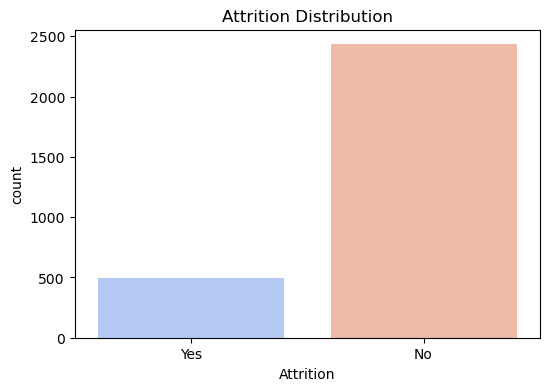

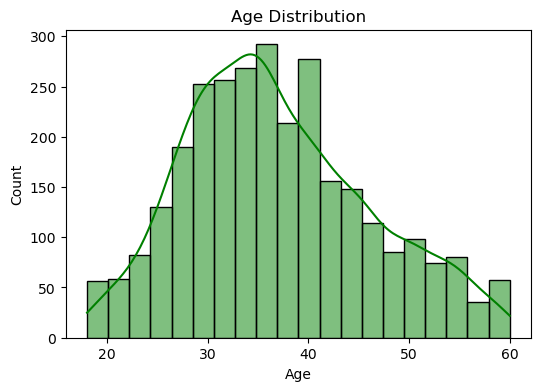

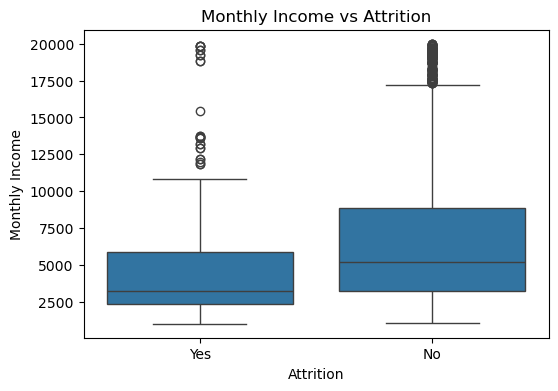

C:\Users\milto\AppData\Local\Temp\ipykernel_14756\3424428376.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Job Satisfaction', data=data, palette='Set2')


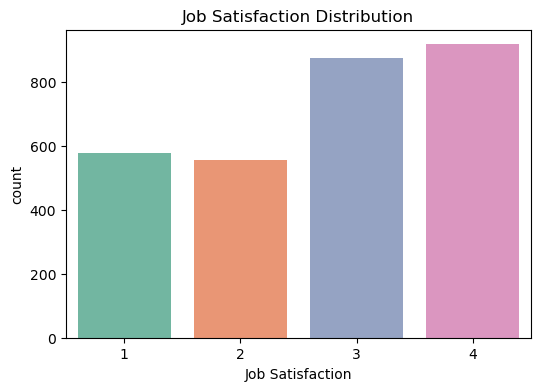

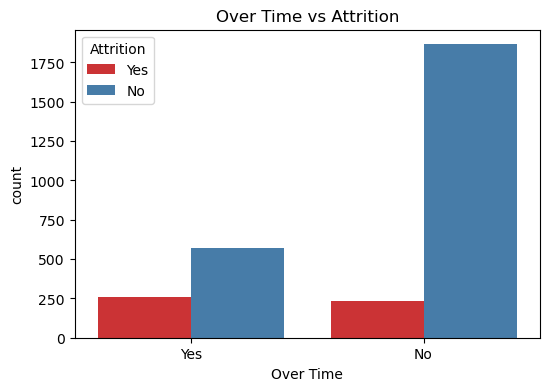

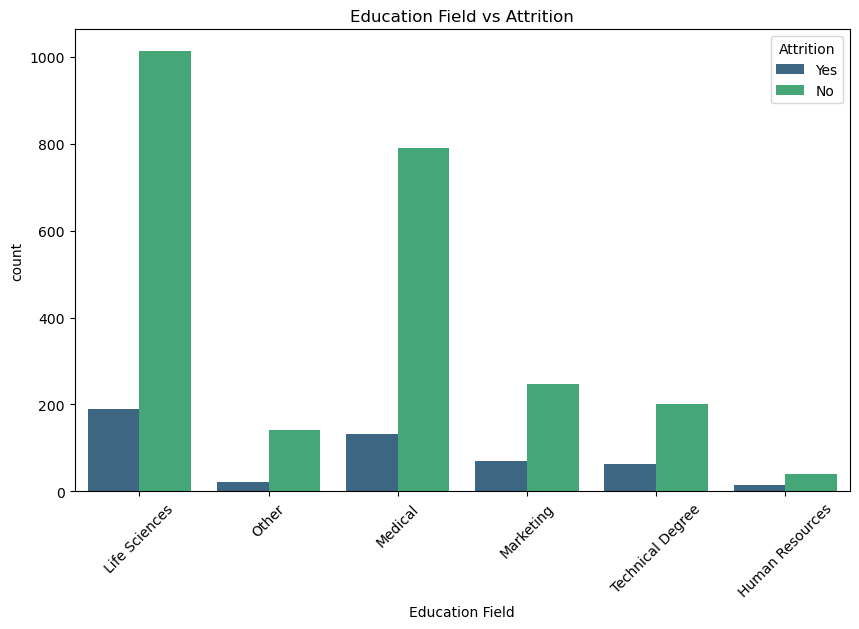

In [3]:
# Distribution of Attrition (binary classification)
plt.figure(figsize=(6, 4))
sns.countplot(x='Attrition', data=data, palette='coolwarm')
plt.title('Attrition Distribution')
plt.show()

# Distribution of Age
plt.figure(figsize=(6, 4))
sns.histplot(data['Age'], kde=True, color='green', bins=20)
plt.title('Age Distribution')
plt.show()

# Boxplot for Monthly Income vs Attrition
plt.figure(figsize=(6, 4))
sns.boxplot(x='Attrition', y='Monthly Income', data=data)
plt.title('Monthly Income vs Attrition')
plt.show()

# Job Satisfaction distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='Job Satisfaction', data=data, palette='Set2')
plt.title('Job Satisfaction Distribution')
plt.show()

# Over Time vs Attrition
plt.figure(figsize=(6, 4))
sns.countplot(x='Over Time', hue='Attrition', data=data, palette='Set1')
plt.title('Over Time vs Attrition')
plt.show()

# Education Field vs Attrition
plt.figure(figsize=(10, 6))
sns.countplot(x='Education Field', hue='Attrition', data=data, palette='viridis')
plt.xticks(rotation=45)
plt.title('Education Field vs Attrition')
plt.show()

### 4. Correlation Analysis (Numerical Features)

In [4]:
# Clean the data (convert categorical columns to numerical values)
# Convert categorical columns to numerical values
data['Attrition'] = data['Attrition'].map({'Yes': 1, 'No': 0})  # Attrition -> 1, 0
data['Over Time'] = data['Over Time'].map({'Yes': 1, 'No': 0})  # Over Time -> 1, 0
data['Performance Status'] = data['Performance Status'].map({'High': 1, 'Low': 0})  # High -> 1, Low -> 0

# You can convert other categorical columns in a similar way if needed
# For example, Job Satisfaction and Job Involvement might also need to be mapped.

# Check the first few rows again to verify the changes
print(data.head())

   Attrition    Business Travel Department Education Field   emp no  \
0          1      Travel_Rarely      Sales   Life Sciences  STAFF-1   
1          0  Travel_Frequently        R&D   Life Sciences  STAFF-2   
2          1      Travel_Rarely        R&D           Other  STAFF-3   
3          1  Travel_Frequently        R&D   Life Sciences  STAFF-4   
4          1      Travel_Rarely        R&D         Medical  STAFF-5   

   Employee Number  Gender               Job Role Marital Status  Over Time  \
0              1.0  Female        Sales Executive         Single          1   
1              2.0    Male     Research Scientist        Married          0   
2              4.0    Male  Laboratory Technician         Single          1   
3              5.0  Female     Research Scientist        Married          1   
4              7.0    Male  Laboratory Technician        Married          0   

   ...  Work Life Balance  Years At Company  Years In Current Role  \
0  ...                  1   

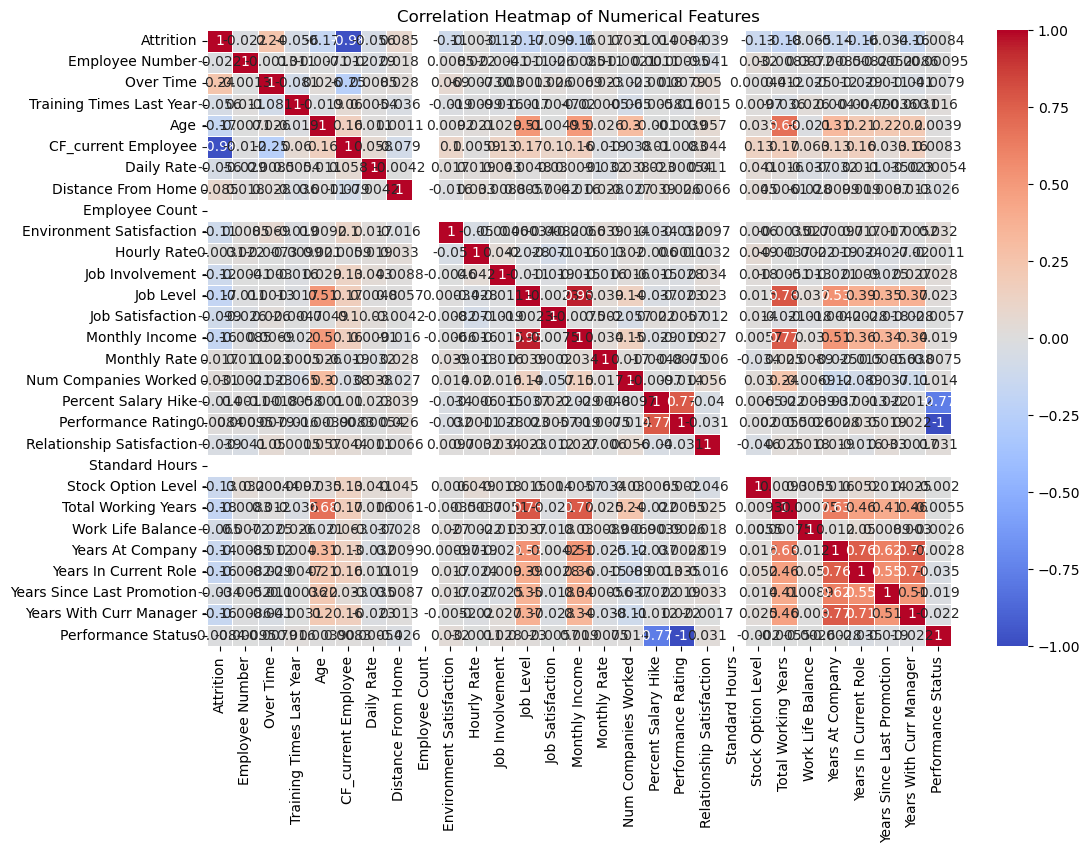

In [5]:
# Compute the correlation matrix for numerical features

# Select only numeric columns for correlation calculation
numeric_data = data.select_dtypes(include=[np.number])

# Compute the correlation matrix
correlation_matrix = numeric_data.corr()

# Plot the correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

C:\Users\milto\AppData\Local\Temp\ipykernel_14756\738929648.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Department', y='Monthly Income', data=data, ci=None, palette='Blues_d')
C:\Users\milto\AppData\Local\Temp\ipykernel_14756\738929648.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Department', y='Monthly Income', data=data, ci=None, palette='Blues_d')


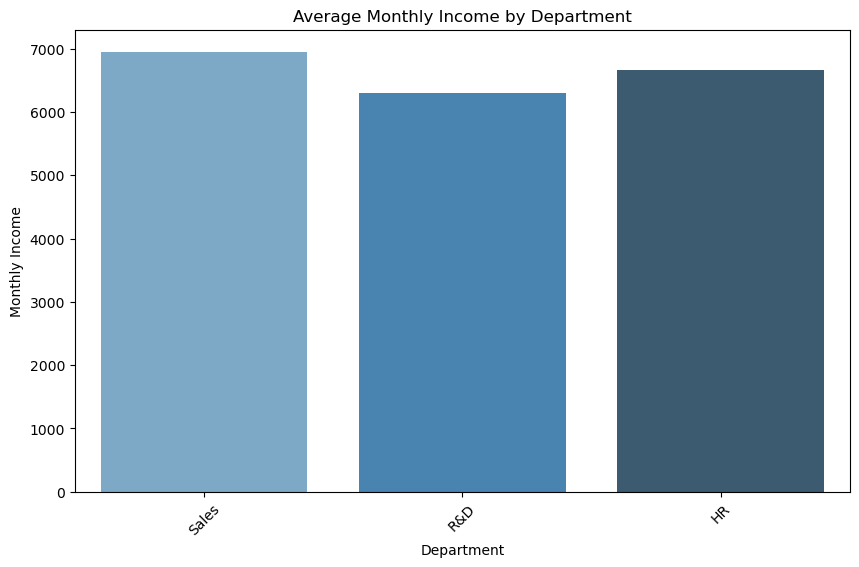

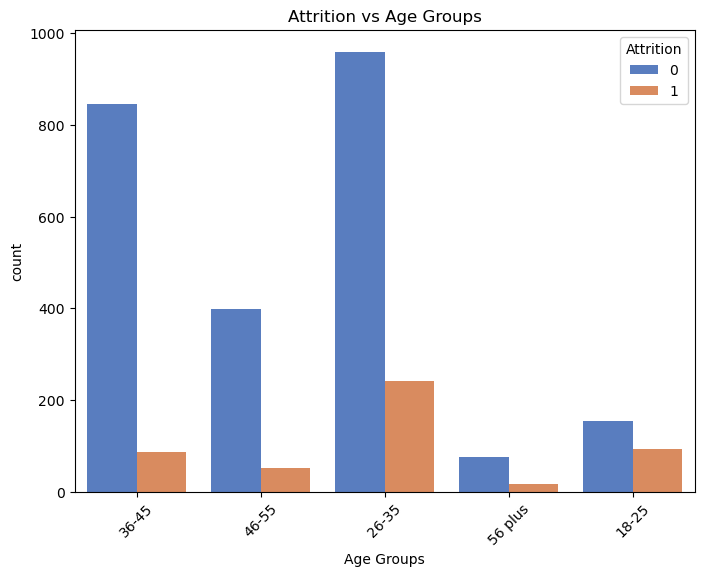

C:\Users\milto\AppData\Local\Temp\ipykernel_14756\738929648.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Attrition', y='Total Working Years', data=data, palette='Set3')


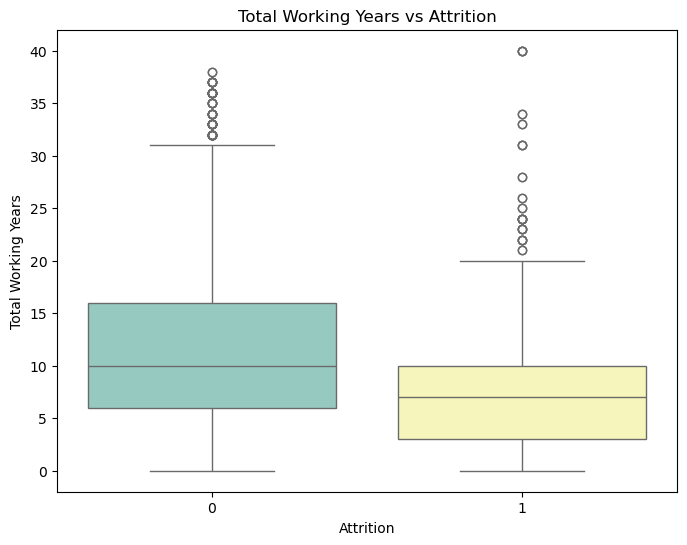

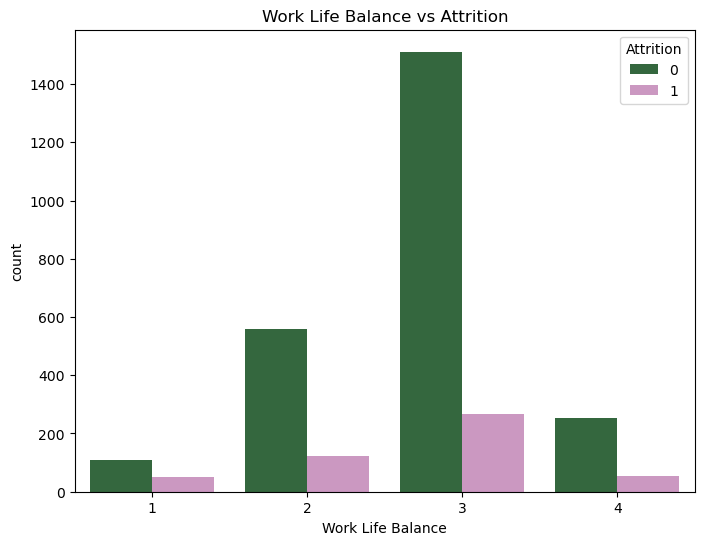

In [6]:
# Average Monthly Income by Department
plt.figure(figsize=(10, 6))
sns.barplot(x='Department', y='Monthly Income', data=data, ci=None, palette='Blues_d')
plt.xticks(rotation=45)
plt.title('Average Monthly Income by Department')
plt.show()

# Attrition vs Age Groups
plt.figure(figsize=(8, 6))
sns.countplot(x='Age Groups', hue='Attrition', data=data, palette='muted')
plt.title('Attrition vs Age Groups')
plt.xticks(rotation=45)
plt.show()

# Relationship between Total Working Years and Attrition
plt.figure(figsize=(8, 6))
sns.boxplot(x='Attrition', y='Total Working Years', data=data, palette='Set3')
plt.title('Total Working Years vs Attrition')
plt.show()

# Work Life Balance vs Attrition
plt.figure(figsize=(8, 6))
sns.countplot(x='Work Life Balance', hue='Attrition', data=data, palette='cubehelix')
plt.title('Work Life Balance vs Attrition')
plt.show()